In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import OneHotEncoder


#cargar el archivo CSV
#df =pd.read_csv("student_depression_dataset.csv")

In [2]:
df.head()

#Para el jueves: analisis de cada columna

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


<Axes: >

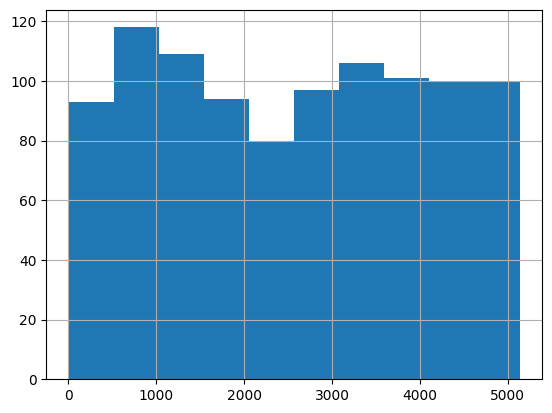

In [3]:
df["id"].hist()

In [5]:
def null_percentage(df):
    """
    Returns a DataFrame with the percentage of null (NaN) values per column.
    """
    percentage = df.isnull().mean() * 100
    return percentage.to_frame(name='Null Percentage')


def zero_percentage(df):
    """
    Returns a DataFrame with the percentage of zero values per column.
    """
    percentage = (df == 0).mean() * 100
    return percentage.to_frame(name='Zero Percentage')

Lectura de Dataset

In [7]:
df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [8]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

Verificación de cantidad de nulos y de zeros

In [9]:
null_percentage(df)

,Null Percentage
id,0.0
Gender,0.0
Age,0.0
City,0.0
Profession,0.0
Academic Pressure,0.0
Work Pressure,0.0
CGPA,0.0
Study Satisfaction,0.0
Job Satisfaction,0.0


In [10]:
zero_percentage(df)

,Zero Percentage
id,0.000000
Gender,0.000000
Age,0.000000
City,0.000000
Profession,0.000000
Academic Pressure,0.000000
Work Pressure,100.000000
CGPA,0.000000
Study Satisfaction,0.000000
Job Satisfaction,99.899800


Analisi de varianza

In [11]:
df['id'].value_counts()
# Alta varianza, por tanto se elimina

id
5136    1
2       1
8       1
26      1
30      1
       ..
62      1
83      1
91      1
94      1
100     1
Name: count, Length: 998, dtype: int64

<Axes: xlabel='Degree'>

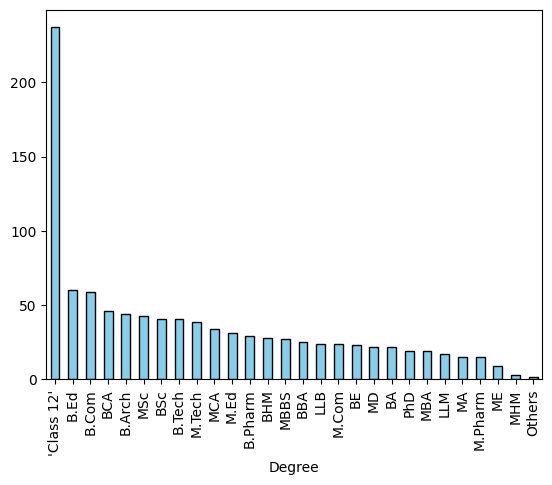

In [14]:
df[('Degree')].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

In [20]:
df = df[~df['Degree'].isin(['Others', 'MHM'])]

# Verificar los cambios
print(df['Degree'].value_counts())

Degree
'Class 12'    237
B.Ed           60
B.Com          59
BCA            46
B.Arch         44
MSc            43
B.Tech         41
BSc            41
M.Tech         39
MCA            34
M.Ed           31
B.Pharm        29
BHM            28
MBBS           27
BBA            25
M.Com          24
LLB            24
BE             23
MD             22
BA             22
PhD            19
MBA            19
LLM            17
M.Pharm        15
MA             15
ME              9
Name: count, dtype: int64


In [21]:
# ELIMINACION DE VARIABLES:
columns_to_drop = ['id', 'Job Satisfaction', 'Work Pressure']
df_clean = df.drop(columns=columns_to_drop)

In [22]:
df_clean.shape

(993, 15)

In [23]:
df_clean.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [24]:
df_clean.head()

,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


## preparación de datos

In [28]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Lista de columnas categóricas
categorical_columns = ['Gender', 'Dietary Habits', 'Degree',
                       'Have you ever had suicidal thoughts ?',
                       'Family History of Mental Illness']

# Inicializamos el codificador
encoder = OneHotEncoder(sparse_output=False, drop='first')  # 'sparse' es ahora 'sparse_output'

# Aplicamos el encoder a las columnas categóricas
encoded_array = encoder.fit_transform(df_clean[categorical_columns])

# Creamos un DataFrame con los datos codificados
encoded_df = pd.DataFrame(encoded_array,
                          columns=encoder.get_feature_names_out(categorical_columns),
                          index=df_clean.index)

# Combinamos con el DataFrame original (sin las columnas categóricas)
df_encoded = pd.concat([df_clean.drop(columns=categorical_columns), encoded_df], axis=1)

# Mostramos el resultado
print(df_encoded.head())


    Age           City Profession  Academic Pressure  CGPA  \
0  33.0  Visakhapatnam    Student                5.0  8.97   
1  24.0      Bangalore    Student                2.0  5.90   
2  31.0       Srinagar    Student                3.0  7.03   
3  28.0       Varanasi    Student                3.0  5.59   
4  25.0         Jaipur    Student                4.0  8.13   

   Study Satisfaction       Sleep Duration  Work/Study Hours  \
0                 2.0          '5-6 hours'               3.0   
1                 5.0          '5-6 hours'               3.0   
2                 5.0  'Less than 5 hours'               9.0   
3                 2.0          '7-8 hours'               4.0   
4                 3.0          '5-6 hours'               1.0   

   Financial Stress  Depression  Gender_Male  Dietary Habits_Moderate  \
0               1.0           1          1.0                      0.0   
1               2.0           0          0.0                      1.0   
2               1.0    